In [1]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import soundfile as sf


#KYW inst
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


In [2]:
# One Pole High Pass Filter
corner_freq = 1000

b_1, a_1 = signal.butter(1, corner_freq, 'high', fs=fs)

w1, H1 = signal.freqz(b_1, a_1)

In [3]:
# Second order High Pass filter from W3

# Variables
w0 = 2 * np.pi * (corner_freq / fs)

Q = 0.7

cos_w0 = np.cos(w0)

sin_w0 = np.sin(w0)

alpha = (sin_w0) / (2 * Q)


# Coefficients

b0_2 = (1 + cos_w0) / 2

b1_2 = -(1 + cos_w0)

b2_2 = (1 + cos_w0) / 2

a0_2 = 1 + alpha

a1_2 = -2 * cos_w0

a2_2 = 1 - alpha

num_2 = [b0_2, b1_2, b2_2]
den_2 = [a0_2, a1_2, a2_2]

w2, H2 = signal.freqz(num_2, den_2)

In [4]:
# Third Order High Pass
b_3, a_3 = signal.butter(3, corner_freq, 'high', fs=fs)

w3, H3 = signal.freqz(b_3, a_3)


# Fourth Order High Pass
b_4, a_4 = signal.butter(4, corner_freq, 'high', fs=fs)

w4, H4 = signal.freqz(b_4, a_4)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_11497/1705963350.py:22: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_11497/1705963350.py:37: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits


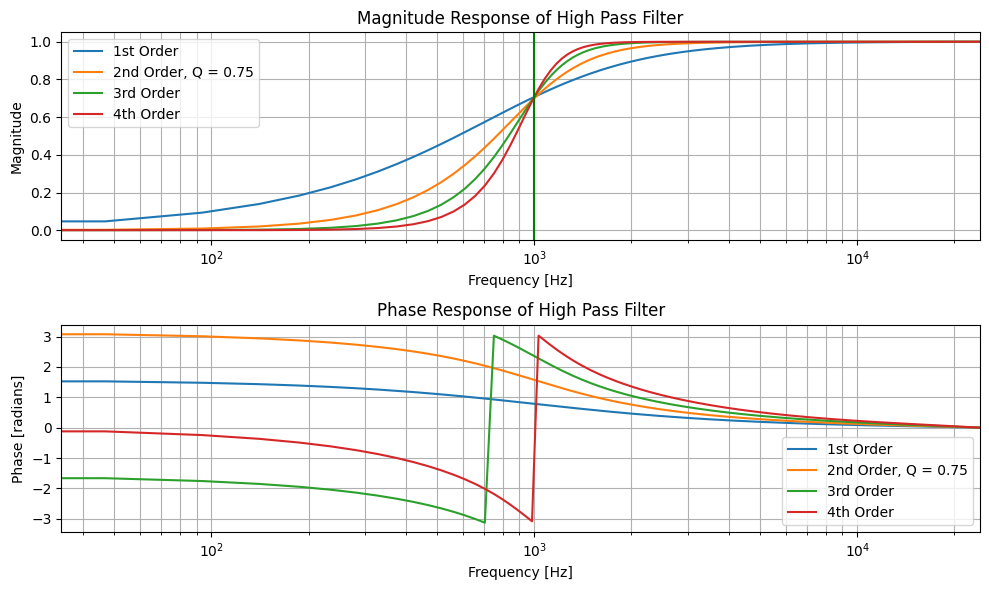

In [5]:
# Convert frequencies to Hz
freq_hz_1p = w1 * (fs / (2 * np.pi))

freq_hz_2p = w2 * (fs / (2 * np.pi))

freq_hz_3p = w3 * (fs / (2 * np.pi))

freq_hz_4p = w4 * (fs / (2 * np.pi))

# Plot magnitude and phase responses in Hz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz_1p, np.abs(H1), label='1st Order')
plt.plot(freq_hz_2p, np.abs(H2), label='2nd Order, Q = 0.75')
plt.plot(freq_hz_3p, np.abs(H3), label='3rd Order')
plt.plot(freq_hz_4p, np.abs(H4), label='4th Order')
plt.title('Magnitude Response of High Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.axvline(corner_freq, color='green')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(freq_hz_1p, np.angle(H1), label='1st Order')
plt.plot(freq_hz_2p, np.angle(H2), label='2nd Order, Q = 0.75')
plt.plot(freq_hz_3p, np.angle(H3), label='3rd Order')
plt.plot(freq_hz_4p, np.angle(H4), label='4th Order')
plt.title('Phase Response of High Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.legend()


plt.tight_layout()
plt.show()

In [6]:
#### Filtering data and playback ####
b = num_2
a = den_2


data_filtL = signal.lfilter(b, a, data[:,0])
data_filtR = signal.lfilter(b, a, data[:,1])

stereoFiltered = np.vstack((data_filtL, data_filtR))
stereoFiltered = np.transpose(stereoFiltered) 

sd.play(stereoFiltered, fs)

In [7]:
#Write to wav file
#sf.write('HighPass_KYW.wav', stereoFiltered, fs,)